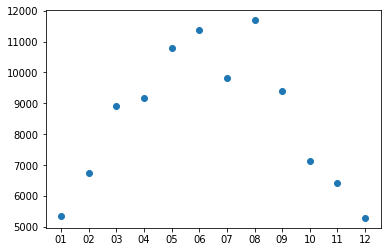

In [52]:
import sqlite3 as sqlite
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite.connect('metro_311.db')
c = conn.cursor()

c.execute('''CREATE TABLE IF NOT EXISTS months (months integer)''')

c.execute('''INSERT INTO months (months)
SELECT substr(requested_datetime, 6, 2) FROM data_311 
''')

c.execute('''SELECT months FROM months''')

dat = pd.DataFrame(c.fetchall())
dat.columns = ['months']

dat_agg = dat.groupby(['months'])[['months']].count()

plt.scatter(dat_agg.index, dat_agg.months)

conn.commit()
conn.close()